In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 
# Let us create a range of 24 days 
days = pd.date_range('4/1/2018', periods=24, freq='D') 
# Now we need to start simulating random daily number of clients 
np.random.seed(42)
clients = np.random.randint(low =4000,high = 7500, size=24)

In [16]:
purchase_per_client = 5 * np.random.random_sample(size = 24) + 8

In [19]:
sales = clients * purchase_per_client
coffee_shop = pd.DataFrame()
coffee_shop['Dates'] = days
coffee_shop['Sales'] = sales
coffee_shop['Clients'] = clients
coffee_shop['Purchase_per_Client'] = purchase_per_client
coffee_shop.reset_index(drop = True, inplace=True)
coffee_shop.set_index('Dates',inplace = True)
pd.set_option('precision', 2)

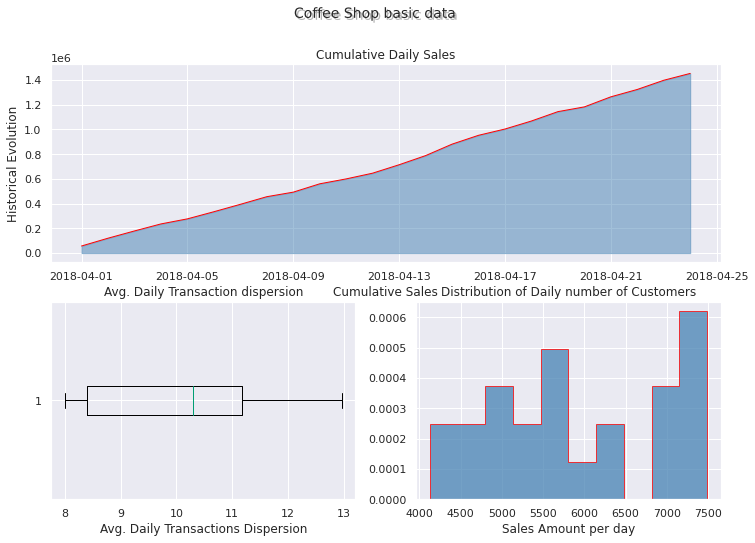

In [22]:
plt.style.use('seaborn-colorblind')
from matplotlib import patheffects
import matplotlib as mpl
plt.figure(figsize=(12,8))
axes1 = plt.subplot2grid((2,2),(0,0), colspan =2)
axes1 = plt.plot(coffee_shop['Sales'].cumsum(), linewidth = 1, color='red')
axes1 = plt.fill_between(coffee_shop.index,coffee_shop['Sales'].cumsum(),color='steelblue',alpha=0.5)
axes1 = plt.title('Cumulative Daily Sales', fontsize = 12)
axes1 = plt.xlabel('Cumulative Sales')
axes1 = plt.ylabel('Historical Evolution')
axes2 = plt.subplot2grid((2,2),(1,0))
axes2 = plt.boxplot(coffee_shop['Purchase_per_Client'], vert = False)
axes2 = plt.title('Avg. Daily Transaction dispersion', fontsize = 12)
axes2 = plt.xlabel('Avg. Daily Transactions Dispersion')
axes3 = plt.subplot2grid((2,2),(1,1))
axes3 = plt.hist(coffee_shop['Clients'],bins = 10, color='steelblue', density = True,
 alpha = 0.75, histtype ='stepfilled',edgecolor ='red')
axes3 = plt.title('Distribution of Daily number of Customers', fontsize = 12)
axes3 = plt.xlabel('Sales Amount per day')
title_text_obj = plt.suptitle('Coffee Shop basic data', fontsize= 14)
title_text_obj.set_path_effects([patheffects.withSimplePatchShadow()])
pe = patheffects.withSimplePatchShadow(offset = (1, -1), shadow_rgbFace = (1,0,0),
 alpha = 0.8)
plt.show()

In [23]:
sales = coffee_shop['Sales']
features = coffee_shop.drop('Sales',axis =1)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaleddrivers = scaler.fit_transform(features)
driverstable = pd.DataFrame(data = scaleddrivers, columns = ['Clients', 'purchase_per_client'])
driverstable.head()

,Clients,purchase_per_client
0,0.91,0.00e+00
1,0.22,1.00e+00
2,0.35,6.22e-01
3,0.30,6.16e-01
4,0.29,6.34e-03


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(driverstable, 
 sales, 
 test_size = 0.2, 
 random_state = 0,
 shuffle = False)
# By default train_test_split shuffles the data, however since we are running a Time series Analysis 
# the order of the data is meaningful, hence, it should be preserved

In [27]:
from sklearn import linear_model
from sklearn import neural_network
from sklearn import ensemble
lr = linear_model.LinearRegression() # Linear Regression Model
br = linear_model.BayesianRidge() # Bayesian Ridge Regression Model
nnr = neural_network.MLPRegressor() # Neural Network Regression Model
rfr = ensemble.RandomForestRegressor() # Random forest regressor Model
abr = ensemble.AdaBoostRegressor() # AdaBoost regressor Model
names = ['Linear Regression', 'Bayesian Ridge',
 'Neural Network', 'Random Forest', 'AdaBoost']
classifiers = [
 lr, # Linear Regression
 br, # Bayesian Ridge
 nnr, # Neural network regressor
 rfr, # Random forest regressor 
 abr] # Adaboost regressor
# iterate over classifiers
for name, clf in zip(names, classifiers):
 clf.fit(X_train, np.ravel(y_train)) # np.ravel converts panda column to numpy array format
 %time score = clf.score(X_test, np.ravel(y_test))
 print ('Classifier: {}, score: {:.4}'.format(name, score))

CPU times: user 1.75 ms, sys: 414 µs, total: 2.16 ms
Wall time: 2.01 ms
Classifier: Linear Regression, score: 0.9876
CPU times: user 2.5 ms, sys: 0 ns, total: 2.5 ms
Wall time: 2.44 ms
Classifier: Bayesian Ridge, score: -0.01182
CPU times: user 1.44 ms, sys: 0 ns, total: 1.44 ms
Wall time: 1.44 ms
Classifier: Neural Network, score: -16.98
CPU times: user 6.52 ms, sys: 398 µs, total: 6.91 ms
Wall time: 6.92 ms
Classifier: Random Forest, score: 0.8603
CPU times: user 4.07 ms, sys: 0 ns, total: 4.07 ms
Wall time: 4.07 ms
Classifier: AdaBoost, score: 0.7766


In [28]:
linear = lr.fit(X_train, np.ravel(y_train))
linear.coef_
X_train.head()

,Clients,purchase_per_client
0,0.91,0.00e+00
1,0.22,1.00e+00
2,0.35,6.22e-01
3,0.30,6.16e-01
4,0.29,6.34e-03


In [34]:
prediccion = linear.predict(X_test)
print('Predicted values based on Linear model:\n {}'.format(np.round(prediccion,2)))
linear.score(X_test,y_test)
np.round(y_test.values,2)
comparison = pd.concat([pd.Series(prediccion),pd.Series(y_test.values)],axis = 1)
comparison.rename(columns = {0:'Prediccion', 1:'Actual Value' },inplace=True)
comparison['Difference'] = (comparison["Actual Value"] - comparison['Prediccion'])
comparison['Error %'] = ((comparison['Actual Value'] - comparison['Prediccion'])/comparison['Actual Value'])*100
comparison

Predicted values based on Linear model:
 [36377.36 79165.05 59531.65 74532.08 57648.  ]


,Prediccion,Actual Value,Difference,Error %
0,36377.36,38468.30,2090.94,5.44
1,79165.05,81236.06,2071.01,2.55
2,59531.65,59652.67,121.03,0.20
3,74532.08,74304.21,-227.87,-0.31
4,57648.00,55371.08,-2276.91,-4.11
